### Exercise 1: Variance Threshold

In [ ]:
# 1.1 Setup
!pip install scikit-learn pandas matplotlib seaborn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

In [2]:
# 1.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


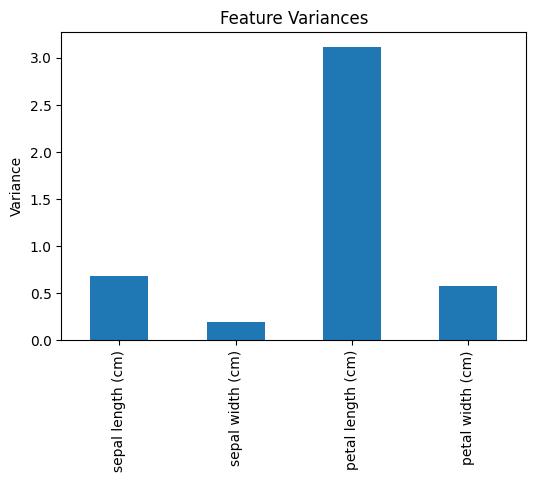

In [3]:
# 1.3 Compute Feature Variances & Plot
variances = X.var()
plt.figure(figsize=(6,4))
variances.plot(kind='bar', title='Feature Variances')
plt.ylabel('Variance')
plt.show()

In [4]:
# 1.4 Apply VarianceThreshold for different thresholds
for thresh in [0.2, 0.6, 0.8]:
  sel = VarianceThreshold(threshold=thresh)
  X_sel = sel.fit_transform(X)
  kept = X.columns[sel.get_support()]
  print(f"Threshold={thresh}: kept features →", list(kept))

Threshold=0.2: kept features → ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Threshold=0.6: kept features → ['sepal length (cm)', 'petal length (cm)']
Threshold=0.8: kept features → ['petal length (cm)']


### 1.4 Analysis

In [5]:
# 1. Removed vs. Kept Features
removed = set(X.columns) - set(kept)
print("Removed features:", removed)

Removed features: {'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)'}


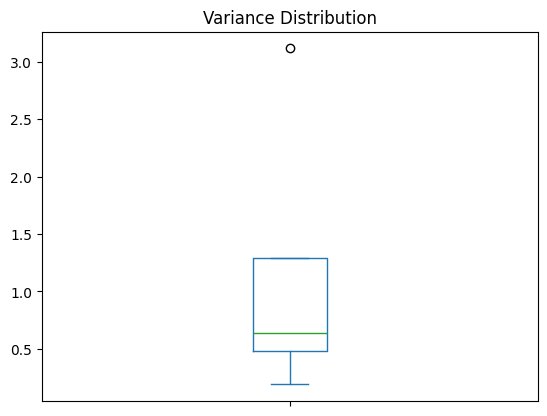

In [6]:

# 2. Variance Distribution
variances.sort_values().plot(kind='box', title="Variance Distribution")
plt.show()

In [7]:
# 3. Threshold Sensitivity
results = []
for t in np.linspace(0, variances.max(), 10):
    sel = VarianceThreshold(threshold=t)
    results.append((t, sel.fit(X).get_support().sum()))
pd.DataFrame(results, columns=['threshold','n_kept']).plot(x='threshold', y='n_kept', marker='o')
plt.title("Features Kept vs. Threshold")
plt.show()

ValueError: No feature in X meets the variance threshold 3.11628

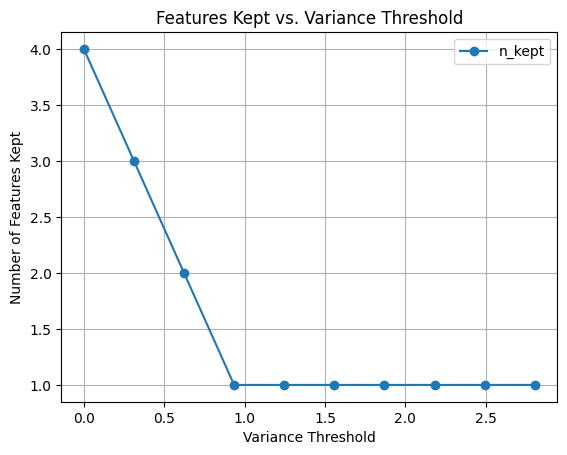

In [10]:
# 3. Threshold Sensitivity (Safe version)
results = []
safe_max = variances.max() * 0.9  # Using 90% of max to avoid edge error

for t in np.linspace(0, safe_max, 10):
    sel = VarianceThreshold(threshold=t)
    X_sel = sel.fit_transform(X)
    n_kept = X_sel.shape[1]
    results.append((t, n_kept))

# Plot results
pd.DataFrame(results, columns=['threshold', 'n_kept']).plot(x='threshold', y='n_kept', marker='o')
plt.title("Features Kept vs. Variance Threshold")
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Features Kept")
plt.grid(True)
plt.show()
